In [2]:
from LIME import LIME
import cv2
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import numpy as np
from skimage import exposure


In [2]:
lime = LIME(iter=30,
                alpha=0.15,
                rho=1.1,
                gamma=0.6,
                strategy=3, 
                eps=0.1,
                sigma=3)

opencv_image = cv2.imread('./pics/pic7.jpeg')
lime.loadimage(opencv_image)
#run
R = lime.run()

100%|██████████| 30/30 [00:09<00:00,  3.17it/s]


In [4]:
def bgrtorgb(img):
    im = img.copy()
    red = im[:,:,2].copy()
    blue = im[:,:,0].copy()

    im[:,:,0] = red
    im[:,:,2] = blue

    return im

100%|██████████| 30/30 [00:09<00:00,  3.23it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 999.5, 666.5, -0.5)

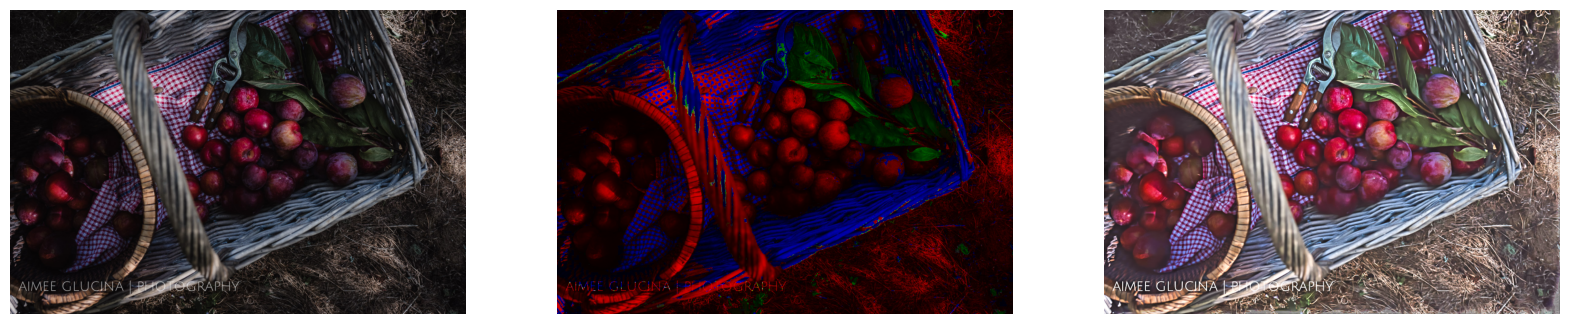

In [27]:
# for p,pic in enumerate(['./pics/pic7.jpeg','./pics/pic8.jpg','./pics/pic9.jpg','./pics/pic13.jpg','./pics/pic14.jpg']):

lime = LIME(iter=30,
            alpha=0.15,
            rho=1.1,
            gamma=0.6,
            strategy=3, 
            eps=0.1,
            sigma=3)

opencv_image = cv2.imread('./pics/pic14.jpg')
lime.loadimage(opencv_image)
#run
R = lime.run()

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(bgrtorgb(lime.img))
plt.axis('off')

plt.subplot(1,3,2)
maxk = (lime.img == lime.img.max(axis=2)[:,:,None]).astype(int)
That = np.repeat(lime.T_hat[..., None], 3, axis = -1)*maxk
plt.imshow(bgrtorgb(That))
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(bgrtorgb(lime.Rf))    
plt.grid(False)
plt.axis('off')


100%|██████████| 30/30 [00:21<00:00,  1.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 30/30 [00:25<00:00,  1.16it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 30/30 [00:31<00:00,  1.04s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
100%|██████████| 30/30 [00:25<00:00,  1.19it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


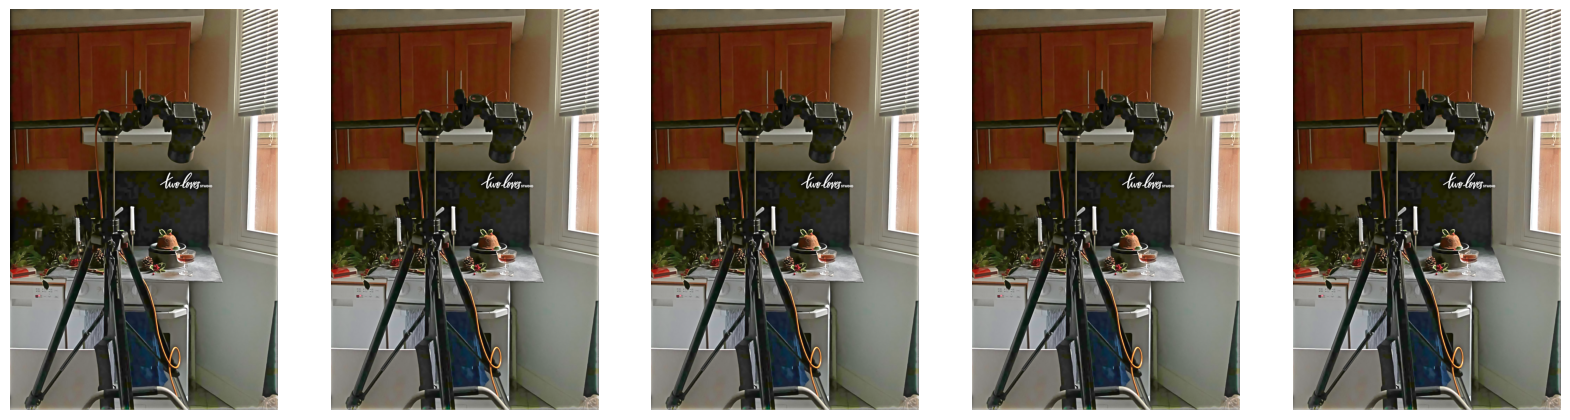

In [11]:
sigmas = [1e-5,1,2,3,4]

plt.figure(figsize=(20,20))
for s,sig in enumerate(sigmas):
    lime = LIME(iter=30,
                alpha=0.15*0.2,
                rho=1.1,
                gamma=0.6,
                strategy=3, 
                eps=0.1,
                sigma=sig)

    opencv_image = cv2.imread('./pics/pic13.jpg')
    lime.loadimage(opencv_image)
    #run
    R = lime.run()

    

    # plt.subplot(1,5,1)
    # plt.imshow(bgrtorgb(lime.img))
    # plt.axis('off')

    # plt.subplot(1,5,2)
    # maxk = (lime.img == lime.img.max(axis=2)[:,:,None]).astype(int)
    # That = np.repeat(lime.T_hat[..., None], 3, axis = -1)*maxk
    # plt.imshow(bgrtorgb(That))
    # plt.axis('off')

    plt.subplot(1,5,s+1)
    plt.imshow(bgrtorgb(lime.Rf))    
    plt.grid(False)
    plt.axis('off')

100%|██████████| 30/30 [00:20<00:00,  1.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 999.5, 1499.5, -0.5)

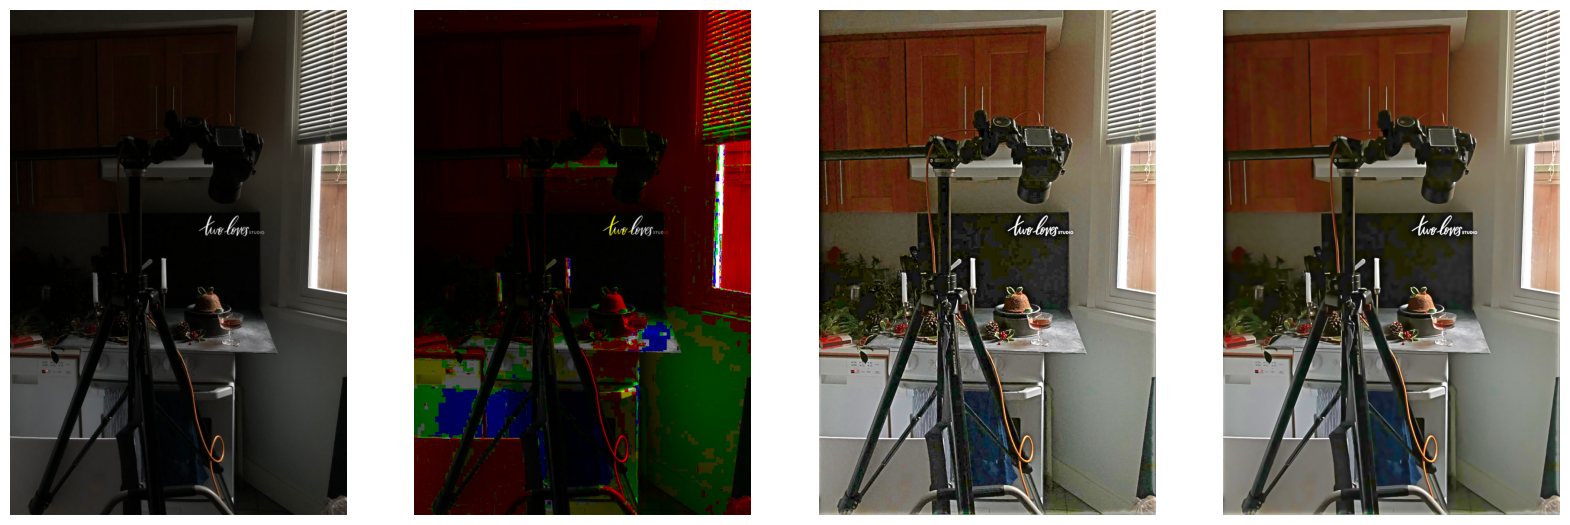

In [15]:
plt.figure(figsize=(20,20))
lime = LIME(iter=30,
            alpha=0.15*0.2,
            rho=1.1,
            gamma=0.6,
            strategy=3, 
            eps=0.1,
            sigma=3)

opencv_image = cv2.imread('./pics/pic13.jpg')
lime.loadimage(opencv_image)
#run
R = lime.run()

plt.subplot(1,4,1)
plt.imshow(bgrtorgb(lime.img))
plt.axis('off')

plt.subplot(1,4,2)
maxk = (lime.img == lime.img.max(axis=2)[:,:,None]).astype(int)
That = np.repeat(lime.T_hat[..., None], 3, axis = -1)*maxk
plt.imshow(bgrtorgb(That))
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(bgrtorgb(lime.R)) 
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(bgrtorgb(lime.Rf))    
plt.grid(False)
plt.axis('off')